In [1]:
#import the modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
dataset = pd.read_csv('./data_kaggle.csv')

dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53883 entries, 0 to 53882
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       53883 non-null  object 
 1   Price          53635 non-null  object 
 2   Rooms          52177 non-null  object 
 3   Bathrooms      51870 non-null  float64
 4   Car Parks      36316 non-null  float64
 5   Property Type  53858 non-null  object 
 6   Size           52820 non-null  object 
 7   Furnishing     46953 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.3+ MB


,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished


In [3]:
#drop duplicate data
dataset.drop_duplicates(inplace=True)
dataset.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished


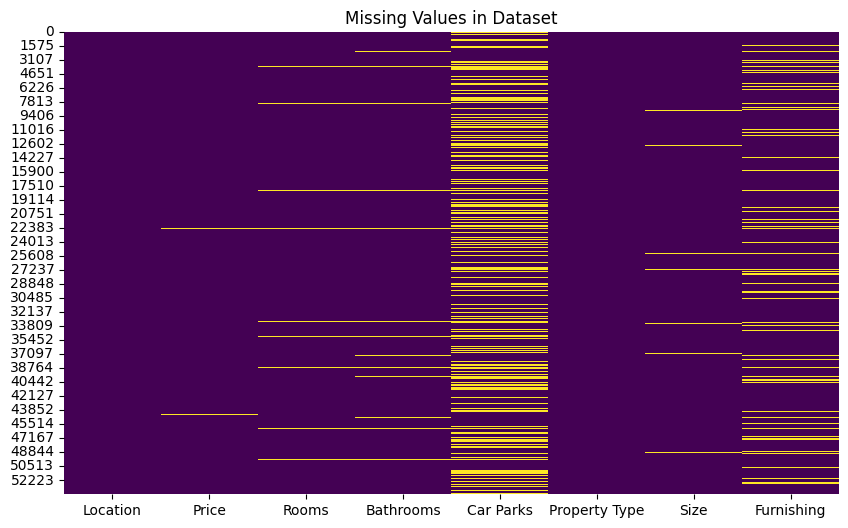

Location             0
Price              218
Rooms             1580
Bathrooms         1864
Car Parks        16302
Property Type       18
Size              1016
Furnishing        6427
dtype: int64


In [4]:
# Check for missing values in each column
missing_values = dataset.isnull().sum()

# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Dataset')
plt.show()

# Print missing values count
print(missing_values)

In [5]:
# Get a statistical summary of numerical columns
dataset.describe()

,Bathrooms,Car Parks
count,47552.000000,33114.000000
mean,3.104748,2.028115
std,1.648901,1.339472
min,1.000000,1.000000
25%,2.000000,1.000000
50%,3.000000,2.000000
75%,4.000000,2.000000
max,20.000000,30.000000


In [7]:
# Do a fast eda using ydata_profiling
from ydata_profiling import ProfileReport
#let's do some profile report
Report=ProfileReport(dataset,title="KL Property Dataset")
Report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

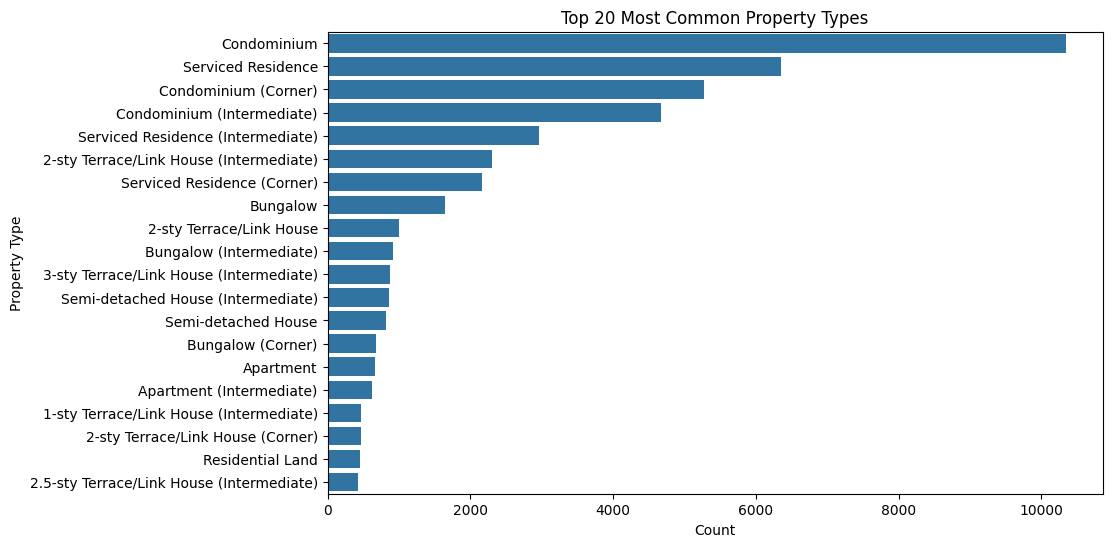

In [7]:
# Get the top 20 property types by count
top_property_types = dataset['Property Type'].value_counts().nlargest(20)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_property_types.index, x=top_property_types.values)
plt.title('Top 20 Most Common Property Types')
plt.xlabel('Count')
plt.ylabel('Property Type')
plt.show()

In [8]:
#Data preprocess
# Function to preprocess the target column 'Price'
def target_preprocess(df, col):
    # Remove 'RM' and commas, convert to numeric
    df[col] = df[col].str.replace('RM', '').str.replace(',', '').apply(pd.to_numeric, errors='coerce')
    
    # Drop rows with missing values in the 'Price' column
    df = df.loc[df[col].notna()]
    
    return df

# Apply the function to preprocess the 'Price' column
dataset = target_preprocess(dataset, 'Price')

# Check the cleaned dataset
dataset.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur",1250000.0,2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur",6800000.0,6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur",1030000.0,3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
4,"Bukit Jalil, Kuala Lumpur",900000.0,4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
5,"Taman Tun Dr Ismail, Kuala Lumpur",5350000.0,4+2,5.0,4.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished


In [9]:
# filter it out Unknown
dataset = dataset[dataset['Furnishing'] != 'Unknown']

In [10]:
dataset['Furnishing'].value_counts()

Furnishing
Partly Furnished    24206
Fully Furnished     12789
Unfurnished          5338
Name: count, dtype: int64

In [11]:
#handle the missing value
def fill_missing_with_zero(df, columns):
    """
    This function fills missing values (NaN) in the specified columns with 0.
    
    Parameters:
    df (DataFrame): The dataframe to modify.
    columns (list): List of columns to fill missing values in.
    
    Returns:
    DataFrame: Modified dataframe with missing values filled with 0 in the specified columns.
    """
    df[columns] = df[columns].fillna(0)
    return df

def drop_missing_rows(df, columns):
    """
    This function drops rows that contain missing values (NaN) in the specified columns.
    
    Parameters:
    df (DataFrame): The dataframe to modify.
    columns (list): List of columns to check for missing values.
    
    Returns:
    DataFrame: Modified dataframe with rows dropped that have missing values in the specified columns.
    """
    df = df.dropna(subset=columns)
    return df

def fill_missing_with_string(df, columns, replaceStr):
    """
    This function fills missing values (NaN) in the specified columns with the string pass.
    
    Parameters:
    df (DataFrame): The dataframe to modify.
    columns (list): List of columns to fill missing values in.
    replaceStr: String want to fill
    
    Returns:
    DataFrame: Modified dataframe with missing values filled with string passed in the specified columns.
    """
    df[columns] = df[columns].fillna(replaceStr)
    return df

In [12]:
dataset = fill_missing_with_zero(dataset, 'Car Parks')
dataset = fill_missing_with_string(dataset, 'Furnishing', 'Unfurnished')
dataset.isna().sum()

Location            0
Price               0
Rooms            1434
Bathrooms        1717
Car Parks           0
Property Type       0
Size              979
Furnishing          0
dtype: int64

In [13]:
dataset = drop_missing_rows(dataset, 'Rooms')
dataset = drop_missing_rows(dataset, 'Bathrooms')
dataset = drop_missing_rows(dataset, 'Size')
dataset.isna().sum()

Location         0
Price            0
Rooms            0
Bathrooms        0
Car Parks        0
Property Type    0
Size             0
Furnishing       0
dtype: int64

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45973 entries, 0 to 53882
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       45973 non-null  object 
 1   Price          45973 non-null  float64
 2   Rooms          45973 non-null  object 
 3   Bathrooms      45973 non-null  float64
 4   Car Parks      45973 non-null  float64
 5   Property Type  45973 non-null  object 
 6   Size           45973 non-null  object 
 7   Furnishing     45973 non-null  object 
dtypes: float64(3), object(5)
memory usage: 3.2+ MB


In [15]:
def clean_rooms_column(x):
    if isinstance(x, int):
        return float(x)
    elif isinstance(x, str):
        if '+' in x:
            nums = [int(n) for n in x.split('+') if n]
            return sum(nums) / len(nums)
        elif x == '20 above':
            return 25.0
        elif x == 'studio':
            return 4.0
    return 3

dataset['Rooms'] = dataset['Rooms'].apply(clean_rooms_column)
dataset['Rooms'].value_counts()

Rooms
3.0     29975
2.0      7292
2.5      4391
1.5      1703
3.5      1142
1.0      1020
4.0       227
6.0        83
4.5        59
7.0        33
5.0        14
8.0        13
10.0        8
5.5         4
12.0        3
13.0        3
9.0         2
15.0        1
Name: count, dtype: int64

In [16]:
import ast

def clean_up_size(df, col):
    # Split the Size column into 'SizeType' and 'SizeValue'
    df[['SizeType', 'SizeValue']] = df[col].str.extract(r'^([^:]+) : (.*) sq\. ft\.$')
    
    # Clean the SizeValue column, replacing 'x' or 'X' with '*'
    df['SizeValue'] = df['SizeValue'].str.replace(',', '').str.replace('x', '*').str.replace('X', '*')
    
    # Function to evaluate expressions
    def evaluate_expression(expr):
        try:
            # Evaluate the expression
            return ast.literal_eval(expr)
        except:
            return None  # Return None for invalid expressions
    
    # Apply the evaluation function to the SizeValue column
    df['SizeValue'] = df['SizeValue'].apply(evaluate_expression).astype(float)
    
    return df

In [17]:
# Apply the clean_up_size function to the dataset
dataset = clean_up_size(dataset, 'Size')
dataset = dataset.drop('Size', axis=1)
# Display the cleaned columns
dataset[['SizeType', 'SizeValue']].head()

,SizeType,SizeValue
0,Built-up,1335.0
1,Land area,6900.0
2,Built-up,1875.0
4,Built-up,1513.0
5,Land area,7200.0


In [18]:
dataset.isna().sum()

Location            0
Price               0
Rooms               0
Bathrooms           0
Car Parks           0
Property Type       0
Furnishing          0
SizeType           59
SizeValue        5342
dtype: int64

In [19]:
dataset = drop_missing_rows(dataset, 'SizeType')
dataset = drop_missing_rows(dataset, 'SizeValue')
dataset.isna().sum()

Location         0
Price            0
Rooms            0
Bathrooms        0
Car Parks        0
Property Type    0
Furnishing       0
SizeType         0
SizeValue        0
dtype: int64

In [20]:
dataset

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Furnishing,SizeType,SizeValue
0,"KLCC, Kuala Lumpur",1250000.0,1.5,3.0,2.0,Serviced Residence,Fully Furnished,Built-up,1335.0
1,"Damansara Heights, Kuala Lumpur",6800000.0,3.0,7.0,0.0,Bungalow,Partly Furnished,Land area,6900.0
2,"Dutamas, Kuala Lumpur",1030000.0,3.0,4.0,2.0,Condominium (Corner),Partly Furnished,Built-up,1875.0
4,"Bukit Jalil, Kuala Lumpur",900000.0,2.5,3.0,2.0,Condominium (Corner),Partly Furnished,Built-up,1513.0
5,"Taman Tun Dr Ismail, Kuala Lumpur",5350000.0,3.0,5.0,4.0,Bungalow,Partly Furnished,Land area,7200.0
...,...,...,...,...,...,...,...,...,...
53878,"Bangsar, Kuala Lumpur",5100000.0,3.0,4.0,0.0,Bungalow (Corner),Fully Furnished,Land area,7168.0
53879,"Bangsar, Kuala Lumpur",5000000.0,3.0,4.0,0.0,Bungalow (Intermediate),Unfurnished,Land area,15000.0
53880,"Bangsar, Kuala Lumpur",5500000.0,3.0,4.0,0.0,Bungalow (Intermediate),Partly Furnished,Land area,7168.0
53881,"Wangsa Maju, Kuala Lumpur",480000.0,3.0,2.0,0.0,Condominium (Intermediate),Unfurnished,Built-up,1150.0


In [21]:
from sklearn.preprocessing import OneHotEncoder

# Apply OneHotEncoding for categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' to avoid multicollinearity

# Fit and transform the categorical columns
X_categorical_encoded = encoder.fit_transform(dataset[['Location', 'Property Type', 'Furnishing', 'SizeType']])

# Convert the resulting array back to a dataframe
X_categorical_encoded_df = pd.DataFrame(X_categorical_encoded, columns=encoder.get_feature_names_out(['Location', 'Property Type', 'Furnishing', 'SizeType']))

# Reset the index of the encoded dataframe to ensure proper concatenation
X_categorical_encoded_df.reset_index(drop=True, inplace=True)

# Concatenate the one-hot encoded categorical columns with the original dataset
# Keep all the original columns (like 'Price', 'Rooms', etc.) and only add the one-hot encoded features
dataset = pd.concat([dataset.reset_index(drop=True), X_categorical_encoded_df], axis=1)

# Drop the original categorical columns as they are now one-hot encoded
dataset.drop(columns=['Location', 'Property Type', 'Furnishing', 'SizeType'], inplace=True)

# Display the resulting dataset
dataset

,Price,Rooms,Bathrooms,Car Parks,SizeValue,"Location_Alam Damai, Kuala Lumpur","Location_Ampang Hilir, Kuala Lumpur","Location_Ampang, Kuala Lumpur","Location_Bandar Damai Perdana, Kuala Lumpur","Location_Bandar Menjalara, Kuala Lumpur",...,Property Type_Serviced Residence (Studio),Property Type_Serviced Residence (Triplex),Property Type_Townhouse,Property Type_Townhouse (Corner),Property Type_Townhouse (Duplex),Property Type_Townhouse (EndLot),Property Type_Townhouse (Intermediate),Furnishing_Partly Furnished,Furnishing_Unfurnished,SizeType_Land area
0,1250000.0,1.5,3.0,2.0,1335.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6800000.0,3.0,7.0,0.0,6900.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1030000.0,3.0,4.0,2.0,1875.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,900000.0,2.5,3.0,2.0,1513.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5350000.0,3.0,5.0,4.0,7200.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40626,5100000.0,3.0,4.0,0.0,7168.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
40627,5000000.0,3.0,4.0,0.0,15000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
40628,5500000.0,3.0,4.0,0.0,7168.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
40629,480000.0,3.0,2.0,0.0,1150.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
dataset.isna().sum()

Price                                     0
Rooms                                     0
Bathrooms                                 0
Car Parks                                 0
SizeValue                                 0
                                         ..
Property Type_Townhouse (EndLot)          0
Property Type_Townhouse (Intermediate)    0
Furnishing_Partly Furnished               0
Furnishing_Unfurnished                    0
SizeType_Land area                        0
Length: 197, dtype: int64

In [23]:
# Print the rows where the price is less than 50,000 or > 50m
outliers = dataset[(dataset['Price'] < 50000) | (dataset['Price'] >= 50000000)]

# Display the outlier data
outliers

,Price,Rooms,Bathrooms,Car Parks,SizeValue,"Location_Alam Damai, Kuala Lumpur","Location_Ampang Hilir, Kuala Lumpur","Location_Ampang, Kuala Lumpur","Location_Bandar Damai Perdana, Kuala Lumpur","Location_Bandar Menjalara, Kuala Lumpur",...,Property Type_Serviced Residence (Studio),Property Type_Serviced Residence (Triplex),Property Type_Townhouse,Property Type_Townhouse (Corner),Property Type_Townhouse (Duplex),Property Type_Townhouse (EndLot),Property Type_Townhouse (Intermediate),Furnishing_Partly Furnished,Furnishing_Unfurnished,SizeType_Land area
704,1800.0,3.0,1.0,0.0,493.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
911,7500.0,3.0,2.0,1.0,1078.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1466,3000.0,3.0,1.0,1.0,538.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2031,8000.0,2.5,5.0,0.0,2096.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2157,2500.0,3.0,2.0,1.0,1384.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39948,1500.0,3.0,2.0,1.0,850.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39953,1100.0,3.0,2.0,1.0,850.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40003,3500.0,2.0,3.0,1.0,1300.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40068,4000.0,3.0,1.0,0.0,1540.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
# Filter the dataset to keep only rows where the price is between 50,000 and 50,000,000
dataset = dataset[(dataset['Price'] > 50000) & (dataset['Price'] <= 50000000)]
dataset.info()
dataset.to_csv('preprocessed_dataset.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 40286 entries, 0 to 40630
Columns: 197 entries, Price to SizeType_Land area
dtypes: float64(197)
memory usage: 60.9 MB
